In [16]:
import pandas
import matplotlib.pyplot as plt
from pmdarima import auto_arima, ARIMA, model_selection
from statsmodels.tsa.stattools import adfuller
df = pandas.read_csv('data/MLTempDataset1.csv')
df.head

<bound method NDFrame.head of       Unnamed: 0             Datetime  Hourly_Temp
0              0  2022-01-04 00:00:00       20.867
1              1  2022-01-04 01:00:00       21.000
2              2  2022-01-04 02:00:00       20.867
3              3  2022-01-04 03:00:00       20.650
4              4  2022-01-04 04:00:00       20.400
...          ...                  ...          ...
7051        7051  2022-10-24 19:00:00       25.567
7052        7052  2022-10-24 20:00:00       25.183
7053        7053  2022-10-24 21:00:00       24.600
7054        7054  2022-10-24 22:00:00       23.986
7055        7055  2022-10-24 23:00:00       23.383

[7056 rows x 3 columns]>

In [9]:
#df['Date'] = pandas.to_datetime(df['Date'], format = "%Y-%m-%d")
#df.set_index('Date', inplace = True)
#df.head

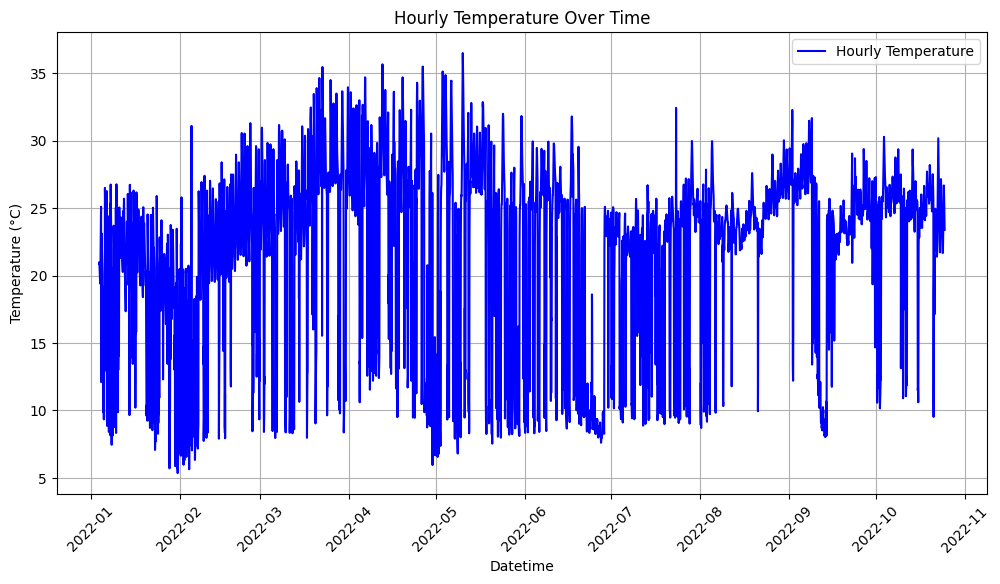

In [14]:
df['Datetime'] = pandas.to_datetime(df['Datetime'])

# Plot Hourly_Temp vs Datetime
plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], df['Hourly_Temp'], label='Hourly Temperature', color='b')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.title('Hourly Temperature Over Time')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

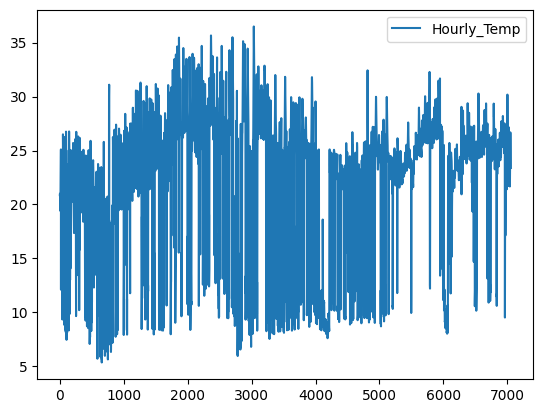

In [26]:
import pandas as pd

# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['Datetime'])
df.set_index('timestamp', inplace=True)

# Display first few rows
print(df.head())
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMAX model
model = SARIMAX(df['Hourly_Temp'], order=(1,1,1), seasonal_order=(1,1,1,24))
result = model.fit()

# Print summary
print(result.summary())


import matplotlib.pyplot as plt

# Forecast
forecast = result.get_forecast(steps=72)
forecast_index = pd.date_range(start=df.index[-1], periods=73, freq='H')[1:]
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

# Plot results
plt.figure(figsize=(12,6))
plt.plot(df.index, df['hourly_temp'], label="Observed")
plt.plot(forecast_series.index, forecast_series, label="Forecast", color='red')
plt.legend()
plt.title("Hourly Temperature Forecast for Next 72 Hours")
plt.show()

                     Unnamed: 0             Datetime  Hourly_Temp
timestamp                                                        
2022-01-04 00:00:00           0  2022-01-04 00:00:00       20.867
2022-01-04 01:00:00           1  2022-01-04 01:00:00       21.000
2022-01-04 02:00:00           2  2022-01-04 02:00:00       20.867
2022-01-04 03:00:00           3  2022-01-04 03:00:00       20.650
2022-01-04 04:00:00           4  2022-01-04 04:00:00       20.400


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mckays1\OneDrive - Wentworth Institute 

                                     SARIMAX Results                                      
Dep. Variable:                        Hourly_Temp   No. Observations:                 7056
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood              -17062.272
Date:                            Sun, 16 Mar 2025   AIC                          34134.544
Time:                                    17:51:59   BIC                          34168.835
Sample:                                01-04-2022   HQIC                         34146.358
                                     - 10-24-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1153      0.133     -0.870      0.384      -0.375       0.144
ma.L1          0.1846      0.130   

C:\Users\mckays1\AppData\Local\Temp\ipykernel_19612\878763434.py:24: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=df.index[-1], periods=73, freq='H')[1:]


KeyError: 'hourly_temp'

<Figure size 1200x600 with 0 Axes>